<a href="https://colab.research.google.com/github/jyotishman888/Covid19_analysis_with_tensorflow_cnn_deeplearning/blob/master/covidanalysiscnncolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -q keras

In [ ]:
import os
import tensorflow as tf

train_dir = '/content/drive/My Drive/data/train'
validation_dir = '/content/drive/My Drive/data/validation'

train_covid_dir = '/content/drive/My Drive/data/train/COVID-19'
train_normal_dir =  '/content/drive/My Drive/data/train/NORMAL'

validation_covid_dir =  '/content/drive/My Drive/data/validation/COVID-19'
validation_normal_dir = '/content/drive/My Drive/data/validation/NORMAL'

In [ ]:
train_covid_fnames = os.listdir( train_covid_dir )
train_normal_fnames = os.listdir( train_normal_dir )

print(train_covid_fnames[:10])
print(train_normal_fnames[:10])

['COVID-19 (1).png', 'COVID-19 (100).png', 'COVID-19 (10).png', 'COVID-19 (101).png', 'COVID-19 (103).png', 'COVID-19 (104).png', 'COVID-19 (105).png', 'COVID-19 (102).png', 'COVID-19 (106).png', 'COVID-19 (109).png']
['Viral Pneumonia (133).png', 'Viral Pneumonia (1288).png', 'Viral Pneumonia (1321).png', 'Viral Pneumonia (1287).png', 'Viral Pneumonia (1309).png', 'Viral Pneumonia (1336).png', 'Viral Pneumonia (1300).png', 'Viral Pneumonia (1317).png', 'Viral Pneumonia (1313).png', 'Viral Pneumonia (1332).png']


In [ ]:
print('Total training Covid images: ', len(os.listdir( train_covid_dir )))
print('Total training Normal images: ', len(os.listdir( train_normal_dir )))


print('Total Validation Covid images: ', len(os.listdir( validation_covid_dir )))
print('Total Validation Normal images: ', len(os.listdir( validation_normal_dir )))

Total training Covid images:  220
Total training Normal images:  2686
Total Validation Covid images:  117
Total Validation Normal images:  160


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

## outputing the image in 4x4 configuration

nrows = 4
ncols = 4

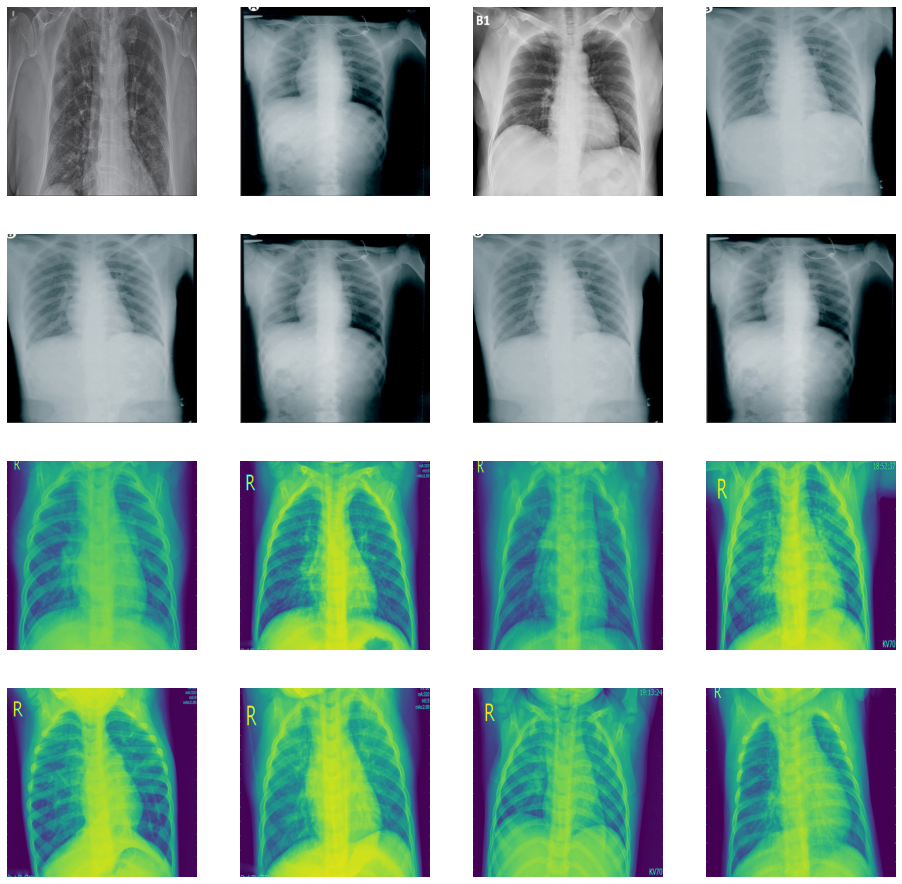

In [ ]:
pic_index = 0
fig = plt.gcf()

fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_covid_pic = [os.path.join( train_covid_dir ,fname)
                  for fname in train_covid_fnames[pic_index-8:pic_index]]


next_normal_pic = [os.path.join( train_normal_dir ,fname)
                  for fname in train_normal_fnames[pic_index-8:pic_index]]          

for i, img_path in enumerate(next_covid_pic+next_normal_pic):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)
      

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=3e-4),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(
                      rescale=1/255,
                      rotation_range=40,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.2,
                      horizontal_flip=True,
                      fill_mode='nearest')

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 2906 images belonging to 2 classes.
Found 277 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=10,  
      epochs=50,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/50
10/10 [==============================] - 18s 2s/step - loss: 0.3353 - accuracy: 0.9400 - val_loss: 1.5772 - val_accuracy: 0.5250
Epoch 2/50
10/10 [==============================] - 18s 2s/step - loss: 0.2852 - accuracy: 0.9300 - val_loss: 0.8906 - val_accuracy: 0.5375
Epoch 3/50
10/10 [==============================] - 17s 2s/step - loss: 0.3798 - accuracy: 0.9000 - val_loss: 1.2113 - val_accuracy: 0.5250
Epoch 4/50
10/10 [==============================] - 17s 2s/step - loss: 0.3001 - accuracy: 0.9100 - val_loss: 1.8184 - val_accuracy: 0.5375
Epoch 5/50
10/10 [==============================] - 17s 2s/step - loss: 0.3446 - accuracy: 0.9100 - val_loss: 0.9097 - val_accuracy: 0.5625
Epoch 6/50
10/10 [==============================] - 17s 2s/step - loss: 0.3418 - accuracy: 0.8900 - val_loss: 0.7107 - val_accuracy: 0.5750
Epoch 7/50
10/10 [==============================] - 17s 2s/step - loss: 0.2261 - accuracy: 0.9500 - val_loss: 1.0561 - val_accuracy: 0.5375
Epoch 8/50
10/10 [==

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(300, 300))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a covid +")
    
  else:
    print(fn + " is normal")

Saving 76052f7902246ff862f52f5d3cd9cd_jumbo.jpg to 76052f7902246ff862f52f5d3cd9cd_jumbo.jpg
[1.]
76052f7902246ff862f52f5d3cd9cd_jumbo.jpg is a covid +


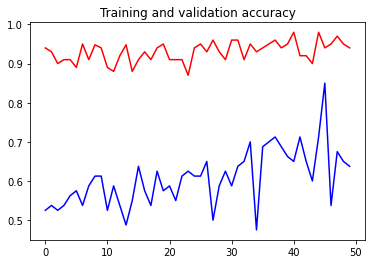

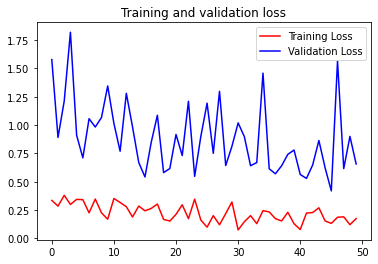

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()